#Linear Regression(Univaraible)

##Plotting the Data

In [1]:
%matplotlib inline 
#노트북 실행한 브라우저에서 바로 그림 볼 수 있게
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Andrew_NG_ML_coursera/ex1data1.txt', names = ['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit in 10 thousands')

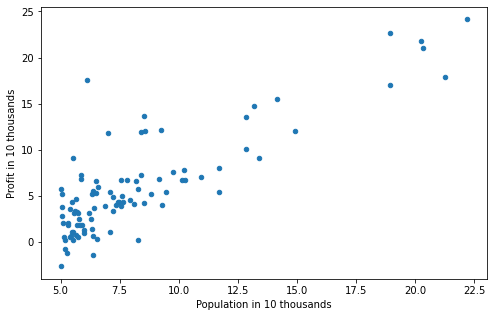

In [3]:
(graph = data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,5))
graph.set_xlabel('Population in 10 thousands')
graph.set_ylabel('Profit in 10 thousands')

## Cost Function

In [4]:
'''
X=input matrix, Y=output matrix, theta=parameters
theta.T= transpose of the matrix
'''

def computeCost(X,y,theta):
  m=len(y)
  predictions=X.dot(theta)
  square_err=np.power((predictions-y),2)
  
  return 1/(2*m) * np.sum(square_err)

In [5]:
'''
θ0을 위해 X 행렬의 1열에 1 추가
DataFrame.insert(loc, column, value, allow_duplicates=False)
'''
data.insert(0,'Ones',1)

In [6]:
cols = data.shape[1] 
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
X = np.matrix(X.values) 
y = np.matrix(y.values) 

In [8]:
theta=np.zeros((2,1))

In [9]:
computeCost(X, y, theta) #testing computeCost function

32.072733877455676

## Gradient descent

In [10]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    num_parameters = int(theta.ravel().shape[0]) #ravel returns flatten matrix
    cost_history = np.zeros(iters)
        
    for i in range(iters):
        error = (X * theta) - y
                
        for j in range(num_parameters):
            term = np.multiply(error, X[:,j])
            temp[j,0] = theta[j,0] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost_history[i] = computeCost(X, y, theta)
                
    return theta, cost_history

In [11]:
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214],
        [ 1.1272942 ]])

In [12]:
computeCost(X, y, g)

4.515955503078914

##Visualize

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
theta0_vals = np.linspace(-10,10,100)

In [15]:
theta1_vals = np.linspace(-1,4,100)

In [16]:
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

In [17]:
for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    t=np.array([theta0_vals[i],theta1_vals[j]])
    J_vals[i,j]=computeCost(X,y,t)

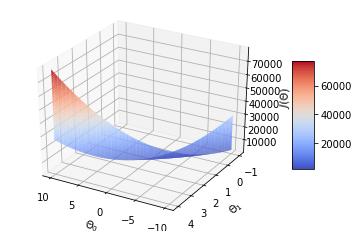

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

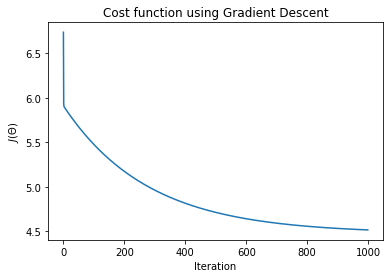

In [21]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
cost

In [33]:
from re import X
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0] +g[1,0] * x

Text(0.5, 1.0, 'Predicted Profit vs Population Size')

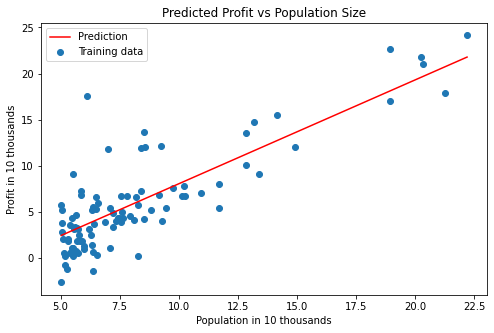

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f ,'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population in 10 thousands')
ax.set_ylabel('Profit in 10 thousands')
ax.set_title('Predicted Profit vs Population Size')